#Deep Learning: Previsão com Keras
## Objetivos
* Aprenda a usar o Keras
* Descubra as estruturas de dados para a previsão
* Aplique redes neurais para regressão
* Entenda o que são redes recorrentes
* Faça previsões com uma LSTM

Link: https://cursos.alura.com.br/course/deep-learning-previsao-keras

## Importando as bibliotecas necessárias

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

## Carregando os dados e explorando os dados

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
df.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [3]:
print(f'Os dados consistem em {df.shape[0]} observações e {df.shape[1]} atributos')

Os dados consistem em 144 observações e 2 atributos


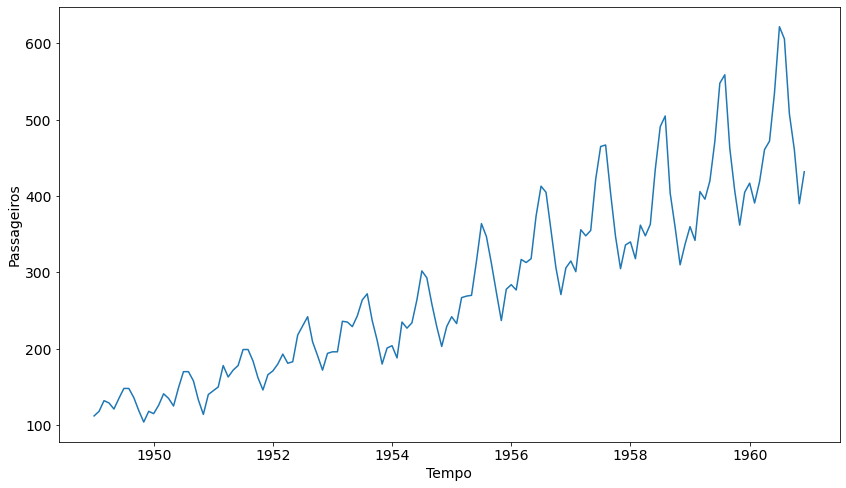

In [4]:
 fig, ax = plt.subplots(figsize=(14,8))
 sns.lineplot(x='tempo', y='passageiros', data=df, ax=ax)
 ax.tick_params(labelsize=14)
 ax.set_xlabel('Tempo', fontsize=14)
 ax.set_ylabel('Passageiros', fontsize=14)
 plt.show()

In [5]:
scaler = StandardScaler()
scaler.fit(df)
data_scaled = scaler.transform(df)

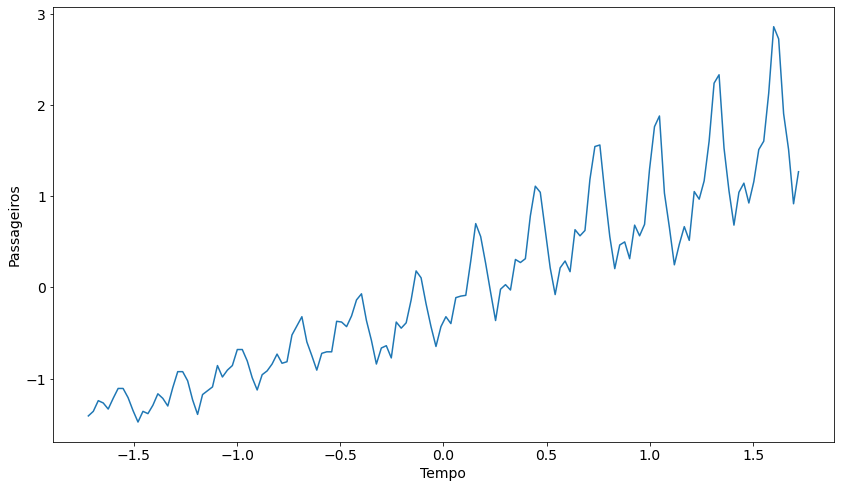

In [6]:
 fig, ax = plt.subplots(figsize=(14,8))
 sns.lineplot(x=data_scaled[:, 0], y=data_scaled[:, 1], ax=ax)
 ax.tick_params(labelsize=14)
 ax.set_xlabel('Tempo', fontsize=14)
 ax.set_ylabel('Passageiros', fontsize=14)
 plt.show()

In [7]:
X = data_scaled[:, 0]
y = data_scaled[:, 1]

train_size = int(len(X) * 0.9)

X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

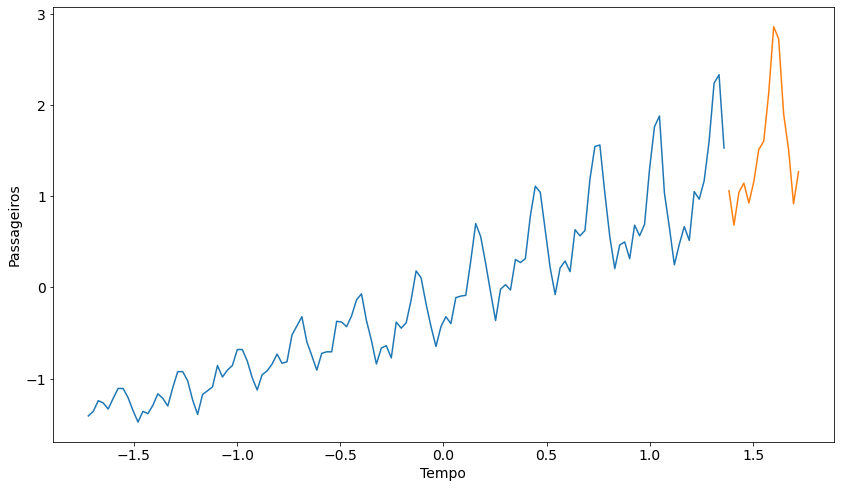

In [8]:
 fig, ax = plt.subplots(figsize=(14,8))
 sns.lineplot(x=X_train, y=y_train, ax=ax)
 sns.lineplot(x=X_test, y=y_test, ax=ax)
 ax.tick_params(labelsize=14)
 ax.set_xlabel('Tempo', fontsize=14)
 ax.set_ylabel('Passageiros', fontsize=14)
 plt.show()

## Criando o modelo

In [9]:
model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))
model.compile(loss='mean_squared_error', optimizer='adam', )
model.fit(X_train, y_train)

5/5 [==============================] - 1s 3ms/step - loss: 0.1285


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [11]:
y_train_pred = model.predict(X_train)

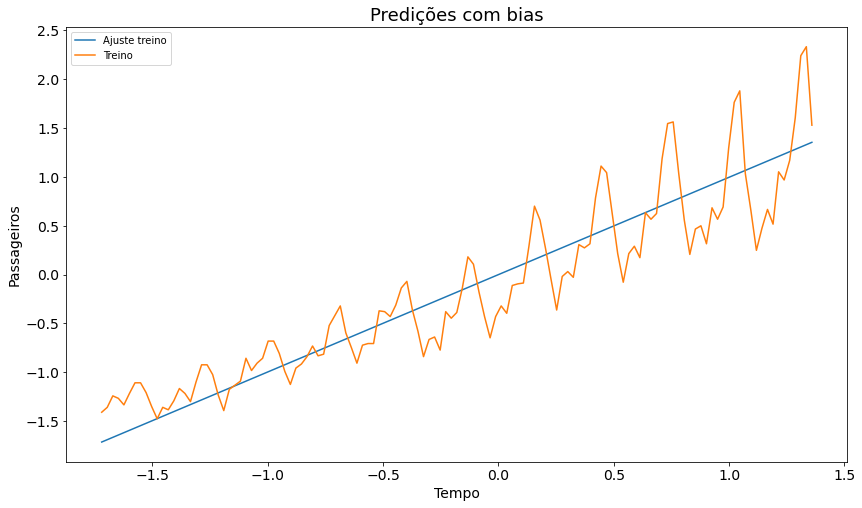

In [ ]:
 fig, ax = plt.subplots(figsize=(14,8))
 sns.lineplot(x=X_train, y=y_pred[:, 0], ax=ax, label='Ajuste treino')
 sns.lineplot(x=X_train, y=y_train, ax=ax, label='Treino')
 ax.tick_params(labelsize=14)
 ax.set_xlabel('Tempo', fontsize=14)
 ax.set_ylabel('Passageiros', fontsize=14)
 ax.set_title('Predições com bias', fontsize=18)
 plt.show()

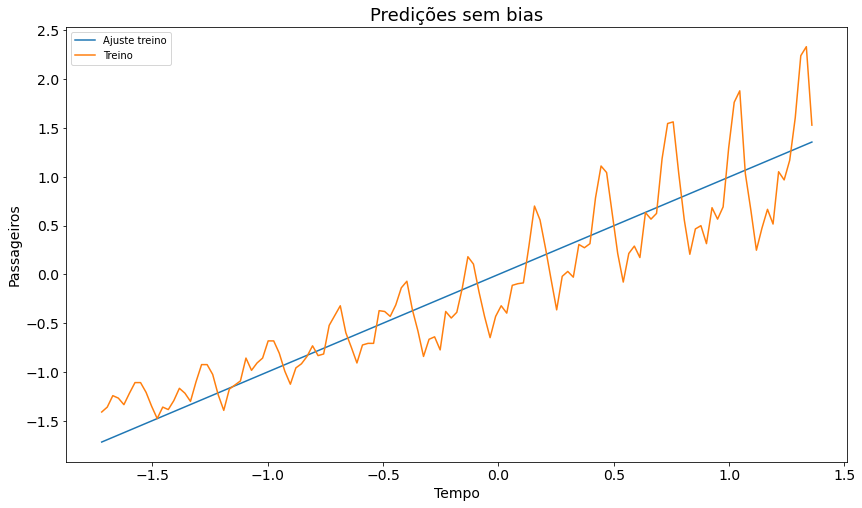

In [ ]:
 fig, ax = plt.subplots(figsize=(14,8))
 sns.lineplot(x=X_train, y=y_pred[:, 0], ax=ax, label='Ajuste treino')
 sns.lineplot(x=X_train, y=y_train, ax=ax, label='Treino')
 ax.tick_params(labelsize=14)
 ax.set_xlabel('Tempo', fontsize=14)
 ax.set_ylabel('Passageiros', fontsize=14)
 ax.set_title('Predições sem bias', fontsize=18)
 plt.show()

In [12]:
y_pred = model.predict(X_test)

In [13]:
y_train_pred[:,0]

array([-1.712845  , -1.6888891 , -1.6649332 , -1.6409774 , -1.6170214 ,
       -1.5930656 , -1.5691097 , -1.5451539 , -1.521198  , -1.4972421 ,
       -1.4732863 , -1.4493303 , -1.4253745 , -1.4014187 , -1.3774627 ,
       -1.3535069 , -1.329551  , -1.3055952 , -1.2816393 , -1.2576833 ,
       -1.2337275 , -1.2097715 , -1.1858157 , -1.1618598 , -1.1379039 ,
       -1.1139481 , -1.0899922 , -1.0660363 , -1.0420804 , -1.0181246 ,
       -0.99416876, -0.9702129 , -0.94625694, -0.9223011 , -0.89834523,
       -0.87438935, -0.85043347, -0.8264776 , -0.80252177, -0.7785659 ,
       -0.75461   , -0.7306541 , -0.70669824, -0.68274236, -0.65878654,
       -0.63483065, -0.6108748 , -0.5869189 , -0.562963  , -0.5390072 ,
       -0.5150513 , -0.49109542, -0.4671395 , -0.44318363, -0.41922778,
       -0.3952719 , -0.37131605, -0.34736016, -0.32340428, -0.29944843,
       -0.27549255, -0.25153667, -0.22758079, -0.20362492, -0.17966905,
       -0.15571317, -0.1317573 , -0.10780143, -0.08384556, -0.05

In [14]:
df_train_pred = pd.DataFrame({'tempo':X_train, 'passageiros':y_train_pred[:,0]})
df_train_pred_itransf = pd.DataFrame(scaler.inverse_transform(df_train_pred), columns=['tempo', 'passageiros'])

df_test_pred = pd.DataFrame({'tempo': X_test, 'passageiros': y_pred[:,0]})
df_test_pred_itransf = pd.DataFrame(scaler.inverse_transform(df_test_pred), columns=['tempo', 'passageiros'])

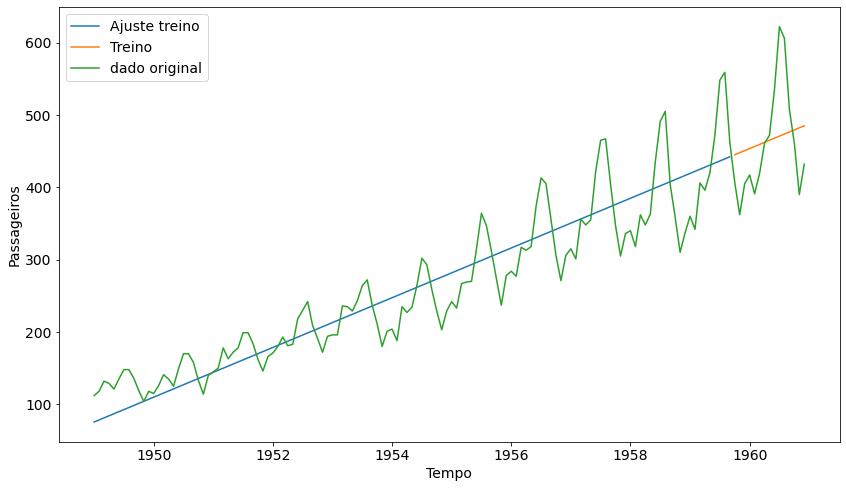

In [16]:
 fig, ax = plt.subplots(figsize=(14,8))
 sns.lineplot(x='tempo', y='passageiros', data=df_train_pred_itransf, ax=ax, label='Ajuste treino')
 sns.lineplot(x='tempo', y='passageiros', data=df_test_pred_itransf, ax=ax, label='Treino')
 sns.lineplot(x='tempo', y='passageiros', data=df, ax=ax, label='dado original')
 ax.tick_params(labelsize=14)
 ax.set_xlabel('Tempo', fontsize=14)
 ax.set_ylabel('Passageiros', fontsize=14)
 plt.legend(fontsize=14)
 plt.show()

## Adicionando mais neurônios na camada oculta

In [17]:
model2 = Sequential()

model2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                 activation='linear', use_bias=False))

model2.add(Dense(8, kernel_initializer='random_uniform', 
                 activation='linear', use_bias=False)) # Não é necessário passar o input_dim pois ele está pegando automaticamente o n de neuronios que entra nele

model2.add(Dense(1, kernel_initializer='random_uniform',
                 activation='linear', use_bias=False))

model2.compile(loss='mean_squared_error', optimizer='adam')

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.fit(X_train, y_train,
              epochs=200)

y_pred = model2.predict(X_test)
y_train_pred = model2.predict(X_train)

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8095
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8090
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8083
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8074
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8060
Epoch 6/200
5/5 [==============================] - 0s 6ms/step - loss: 0.8041
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8011
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7971
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7915
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7842
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7742
Epoch 12/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7625
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

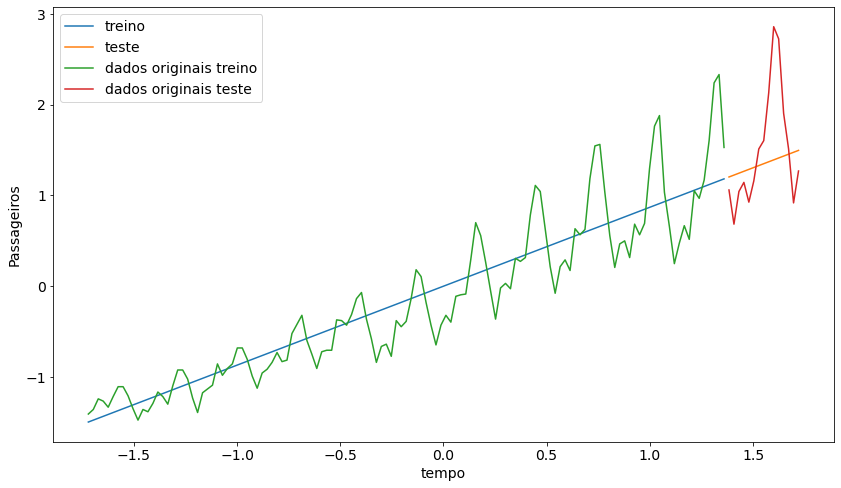

In [19]:
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(x=X_train, y=y_train_pred[:,0], ax=ax, label='treino')
sns.lineplot(x=X_test, y=y_pred[:,0], ax=ax, label='teste')
sns.lineplot(x=X_train, y=y_train, label='dados originais treino')
sns.lineplot(x=X_test, y=y_test, label='dados originais teste')

ax.legend(fontsize=14)
ax.tick_params(labelsize=14)
ax.set_xlabel('tempo', fontsize=14)
ax.set_ylabel('Passageiros', fontsize=14)

plt.show()

## adicionando uma função não linear as camadas~

A função **sigmoide** é utilizada em camadas finais, por exemplo, quando eu desejo uma saída como uma probabilidade de função, por exemplo, eu sei o valor 1 e eu também sei os valores intermediários, por exemplo, 70% de probabilidade de ter uma resposta, a 20%, e assim por diante, mas essa função de ativação sigmoide, ela também pode ser utilizada em camadas intermediárias, e isso nos ajuda a adicionar uma não-linearidade na nossa rede neural.

In [20]:
model2 = Sequential()

model2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                 activation='sigmoid', use_bias=False))

model2.add(Dense(8, kernel_initializer='random_uniform', 
                 activation='sigmoid', use_bias=False)) # Não é necessário passar o input_dim pois ele está pegando automaticamente o n de neuronios que entra nele

model2.add(Dense(1, kernel_initializer='random_uniform',
                 activation='linear', use_bias=False))

model2.compile(loss='mean_squared_error', optimizer='adam')

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.fit(X_train, y_train,
              epochs=500)

y_pred = model2.predict(X_test)
y_train_pred = model2.predict(X_train)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8018
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7976
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7950
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7928
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7927
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7921
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7916
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7901
Epoch 9/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7891
Epoch 10/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7890
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7880
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7874
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

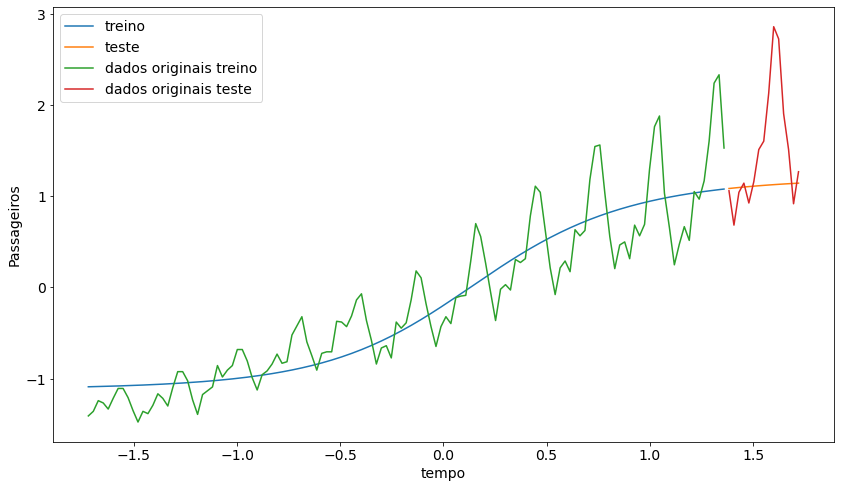

In [22]:
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(x=X_train, y=y_train_pred[:,0], ax=ax, label='treino')
sns.lineplot(x=X_test, y=y_pred[:,0], ax=ax, label='teste')
sns.lineplot(x=X_train, y=y_train, label='dados originais treino')
sns.lineplot(x=X_test, y=y_test, label='dados originais teste')

ax.legend(fontsize=14)
ax.tick_params(labelsize=14)
ax.set_xlabel('tempo', fontsize=14)
ax.set_ylabel('Passageiros', fontsize=14)

plt.show()

In [23]:
def atrasa_dados(vetor, n_passos):
  X_novo, y_novo = [], []
  for i in range(n_passos, len(vetor)):
    X_novo.append(vetor.loc[i-n_passos].values[0])
    y_novo.append(vetor.loc[i][0])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [24]:
X_train_new, y_train_new = atrasa_dados(pd.DataFrame(y_train), 1)
X_train_new[:5]

array([-1.40777884, -1.35759023, -1.24048348, -1.26557778, -1.33249593])

In [25]:
X_test_new, y_test_new = atrasa_dados(pd.DataFrame(y_test), 1)
X_test_new

array([1.05982773, 0.68341317, 1.04309819, 1.14347541, 0.92599144,
       1.16020494, 1.5115252 , 1.60353765, 2.13051803, 2.85825285,
       2.72441656, 1.9046693 , 1.5115252 , 0.91762667])

## Modelo 3

In [26]:
model3 = Sequential()

model3.add(Dense(8, input_dim=1, kernel_initializer='ones', 
                 activation='linear', use_bias=False))

model3.add(Dense(64, kernel_initializer='random_uniform',
                 activation='sigmoid', use_bias=False))

model3.add(Dense(1, kernel_initializer='random_uniform',
                 activation='linear', use_bias=False))

model3.compile(loss='mean_squared_error', optimizer='adam')

model3.fit(X_train_new, y_train_new,
           epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7755
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7482
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7289
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7088
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6902
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6680
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6407
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6146
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5879
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5548
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5205
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4834
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [27]:
y_pred_train_new = model3.predict(X_train_new)
y_pred_test_new = model3.predict(X_test_new)

In [28]:
y_pred_train_new[:,0]

array([-1.299156  , -1.2625825 , -1.173459  , -1.1930021 , -1.2439303 ,
       -1.1536741 , -1.0651696 , -1.0651696 , -1.1470257 , -1.2563922 ,
       -1.3464067 , -1.2625825 , -1.2809911 , -1.2123027 , -1.1133828 ,
       -1.1536741 , -1.2186823 , -1.058177  , -0.9054141 , -0.9054141 ,
       -0.994076  , -1.1668909 , -1.2870731 , -1.1201645 , -1.0859904 ,
       -1.0511581 , -0.8443521 , -0.9575701 , -0.89029205, -0.8443521 ,
       -0.6771454 , -0.6771454 , -0.7975719 , -0.9649216 , -1.0790764 ,
       -0.9353656 , -0.8978653 , -0.8288507 , -0.7258913 , -0.8210653 ,
       -0.8054258 , -0.5181983 , -0.41468135, -0.30920756, -0.5943122 ,
       -0.7419725 , -0.89029205, -0.7178188 , -0.7016113 , -0.7016113 ,
       -0.36216283, -0.37094766, -0.42338818, -0.30034298, -0.11220817,
       -0.03986087, -0.35336584, -0.5775205 , -0.8288507 , -0.660734  ,
       -0.63596904, -0.7659327 , -0.37094766, -0.44076014, -0.37972015,
       -0.11220817,  0.23159914,  0.15039554, -0.15728371, -0.42

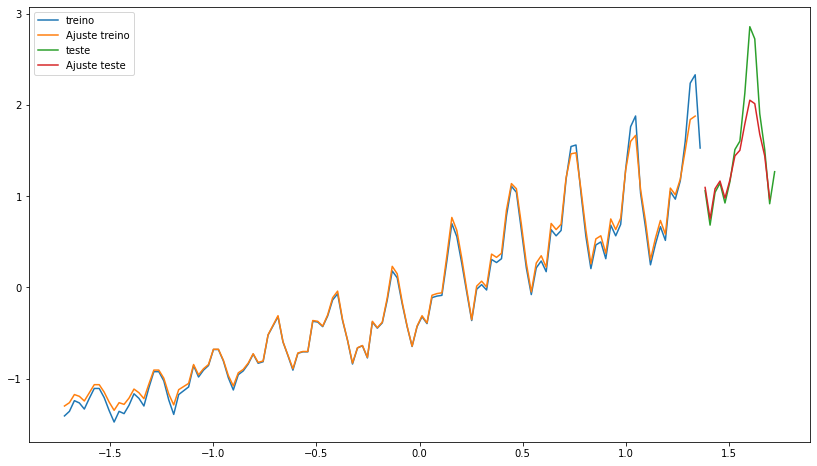

In [29]:
fig,ax = plt.subplots(figsize=(14,8))
sns.lineplot(x=X_train, y=y_train, ax=ax, label='treino')
sns.lineplot(x=X_train[:-1], y=y_pred_train_new[:,0], label='Ajuste treino', ax=ax)
sns.lineplot(x=X_test, y=y_test, ax=ax, label='teste')
sns.lineplot(x=X_test[:-1], y=y_pred_test_new[:, 0], ax=ax, label='Ajuste teste')

plt.show()

## Model 4

In [30]:
X_train_new, y_train_new = atrasa_dados(pd.DataFrame(y_train), 4)

X_test_new, y_test_new = atrasa_dados(pd.DataFrame(y_test), 4)

In [31]:
model4 = Sequential()

model4.add(Dense(8, input_dim=1, kernel_initializer='ones', 
                 activation='linear', use_bias=False))

model4.add(Dense(64, kernel_initializer='random_uniform',
                 activation='sigmoid', use_bias=False))

model4.add(Dense(1, kernel_initializer='random_uniform',
                 activation='linear', use_bias=False))

model4.compile(loss='mean_squared_error', optimizer='adam')

model4.fit(X_train_new, y_train_new,
           epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7625
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7375
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7234
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7080
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6904
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6724
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6542
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6343
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6132
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5904
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5647
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5392
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [32]:
y_pred_train_new = model4.predict(X_train_new)
y_pred_test_new = model4.predict(X_test_new)

ValueError: ignored

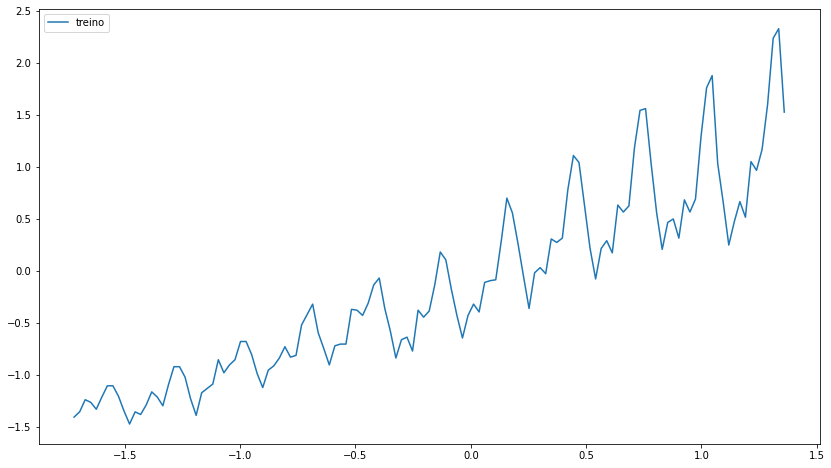

In [33]:
fig,ax = plt.subplots(figsize=(14,8))
sns.lineplot(x=X_train, y=y_train, ax=ax, label='treino')
sns.lineplot(x=X_train[1:], y=y_pred_train_new[:,0], label='Ajuste treino', ax=ax)
sns.lineplot(x=X_test, y=y_test, ax=ax, label='teste')
sns.lineplot(x=X_test[1:], y=y_pred_test_new[:, 0], ax=ax, label='Ajuste teste')

plt.show()

# Base de dados 2 - Bicicletas

In [2]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv')
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
bike['datas'] = pd.to_datetime(bike['datas'])

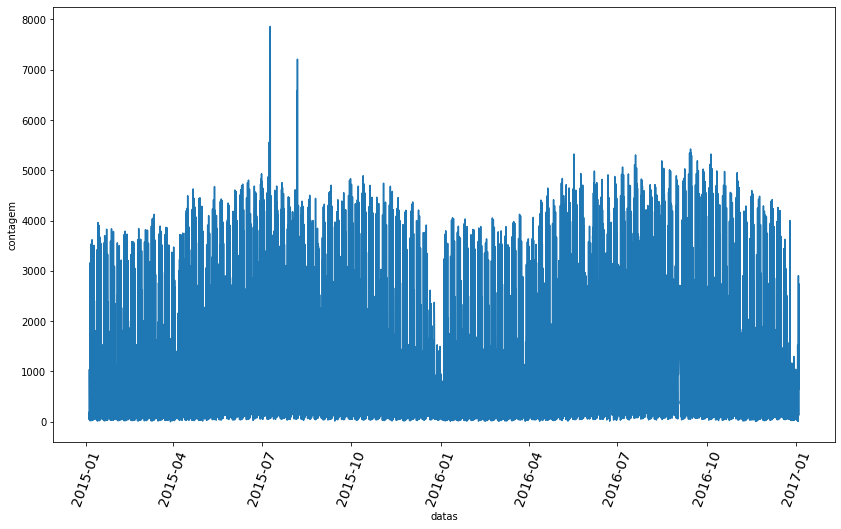

In [4]:
fig,ax = plt.subplots(figsize=(14,8))
sns.lineplot(x='datas', y='contagem', data=bike, ax=ax)
ax.tick_params(axis='x', rotation=70, labelsize=14)
plt.show()

In [15]:
scaler2 = StandardScaler()
y = scaler2.fit_transform(bike['contagem'].values.reshape(-1,1))

In [17]:
train_size = int(0.9 * len(bike))

y_train = y[:train_size, 0]
y_test = y[train_size:, 0]

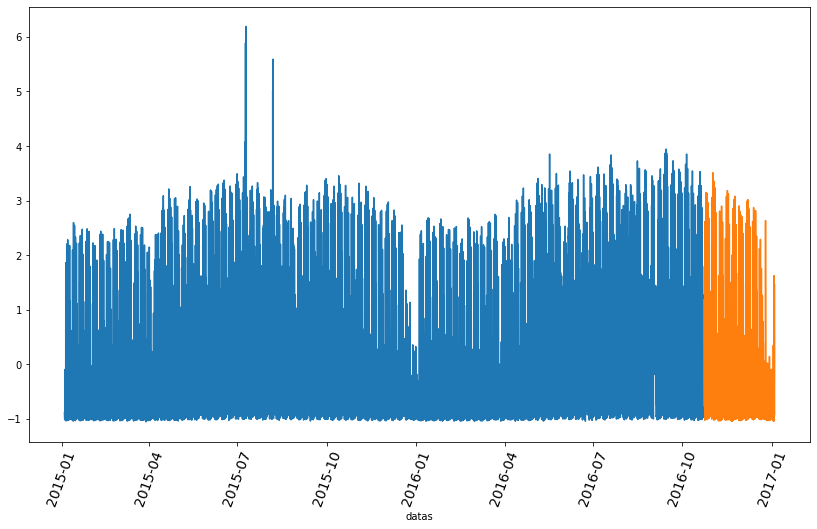

In [18]:
fig,ax = plt.subplots(figsize=(14,8))
sns.lineplot(x='datas', y=y_train, data=bike[:train_size], ax=ax)
sns.lineplot(x='datas', y=y_test, data=bike[train_size:], ax=ax)
ax.tick_params(axis='x', rotation=70, labelsize=14)
plt.show()

## Utilizando uma rede recorrente

In [24]:
def atrasa_dados(vetor, n_passos):
  X_novo, y_novo = [], []
  for i in range(n_passos, len(vetor)):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [39]:
X_train_new, y_train_new = atrasa_dados(pd.DataFrame(y_train)[0], 10)
X_test_new, y_test_new = atrasa_dados(pd.DataFrame(y_test)[0], 10)
print(X_train_new.shape)
print(y_train_new.shape)
print(X_test_new.shape)
print(y_test_new.shape)

(15662, 10)
(15662,)
(1732, 10)
(1732,)


In [48]:
X_train_new1 = X_train_new.reshape((X_train_new.shape[0], X_train_new.shape[1], 1))
X_test_new1 = X_test_new.reshape((X_test_new.shape[0], X_test_new.shape[1], 1))

In [50]:
recorrente = Sequential()

recorrente.add(LSTM(128, input_shape=(X_train_new1.shape[1], X_train_new1.shape[2])))
recorrente.add(Dense(units=1))

recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')
recorrente.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [51]:
resultados = recorrente.fit(X_train_new1, y_train_new, 
                            validation_data=(X_test_new1, y_test_new), 
                            epochs=100)

Epoch 1/100
490/490 [==============================] - 9s 13ms/step - loss: 0.2712 - val_loss: 0.0709
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0798 - val_loss: 0.0446
Epoch 3/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0544 - val_loss: 0.0474
Epoch 4/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0469 - val_loss: 0.0277
Epoch 5/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0423 - val_loss: 0.0260
Epoch 6/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0396 - val_loss: 0.0332
Epoch 7/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0370 - val_loss: 0.0258
Epoch 8/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0350 - val_loss: 0.0245
Epoch 9/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0339 - val_loss: 0.0216
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.033

In [52]:
y_ajustado = recorrente.predict(X_train_new1)

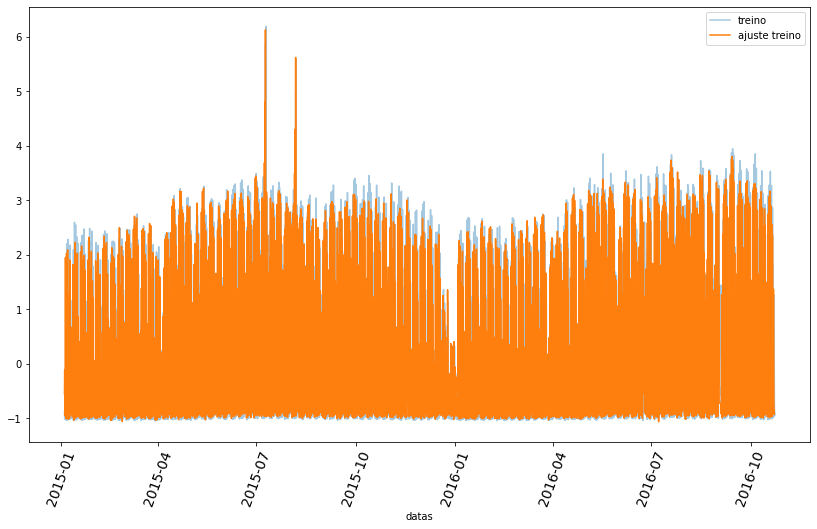

In [66]:
fig,ax = plt.subplots(figsize=(14,8))
sns.lineplot(x='datas', y=y_train[:], data=bike[:train_size], ax=ax, alpha=0.4, 
             label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[:X_train_new.shape[0]], ax=ax,
             label='ajuste treino')
ax.tick_params(axis='x', rotation=70, labelsize=14)
plt.show()

In [68]:
y_pred = recorrente.predict(X_test_new1)

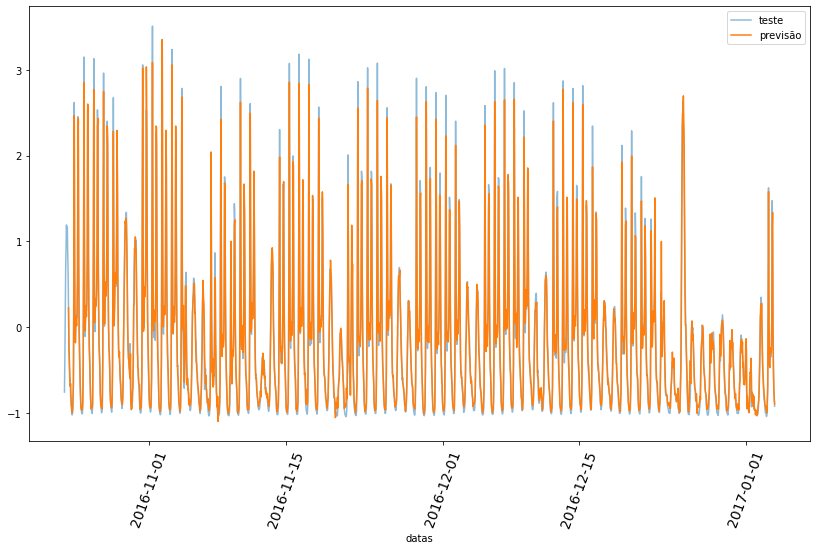

In [70]:
fig,ax = plt.subplots(figsize=(14,8))
sns.lineplot(x='datas', y=y_test, data=bike[train_size:], ax=ax, alpha=0.5, 
             label='teste')
sns.lineplot(x='datas', y=y_pred[:,0], data=bike[train_size+10:len(bike)], ax=ax,
             label='previsão')
ax.tick_params(axis='x', rotation=70, labelsize=14)
plt.show()

## Utilizando neuronios do tipo GRU

In [77]:
recorrente_g = Sequential()

recorrente_g.add(GRU(128, input_shape=(X_train_new1.shape[1], X_train_new1.shape[2])))
recorrente_g.add(Dense(units=1))

recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')
recorrente_g.summary() 
# É possivel ver que GRU tem menos parametros que o LSTM, por isso é treinado mais rápido

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 128)               50304     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [76]:
recorrente.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [83]:
resultados2 = recorrente_g.fit(X_train_new1, y_train_new, 
                 validation_data=(X_test_new1, y_test_new), 
                 epochs=100)

Epoch 1/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0220 - val_loss: 0.0171
Epoch 2/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0217 - val_loss: 0.0143
Epoch 3/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0215 - val_loss: 0.0161
Epoch 4/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0213 - val_loss: 0.0177
Epoch 5/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0213 - val_loss: 0.0146
Epoch 6/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0212 - val_loss: 0.0153
Epoch 7/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0208 - val_loss: 0.0165
Epoch 8/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0208 - val_loss: 0.0172
Epoch 9/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0208 - val_loss: 0.0154
Epoch 10/100
490/490 [==============================] - 5s 10ms/step - loss: 0.020

In [86]:
y_pred2 = recorrente_g.predict(X_test_new1)

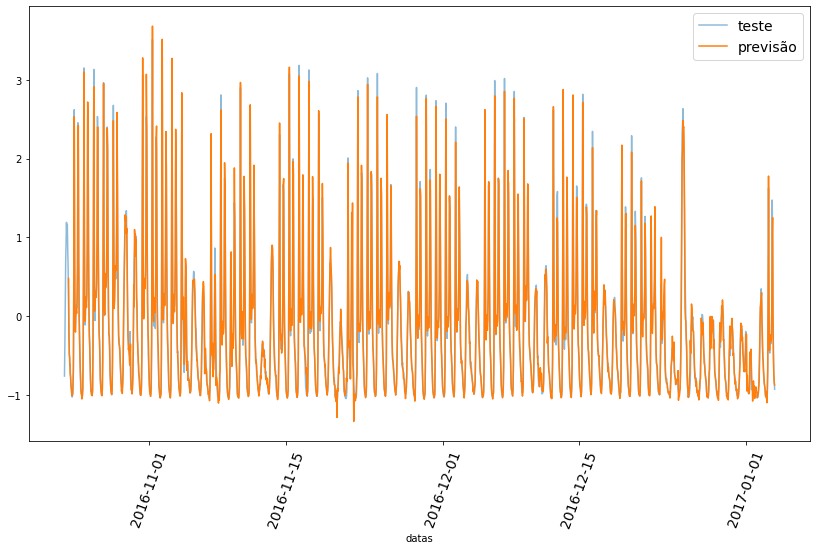

In [87]:
fig,ax = plt.subplots(figsize=(14,8))
sns.lineplot(x='datas', y=y_test, data=bike[train_size:], ax=ax, alpha=0.5, 
             label='teste')
sns.lineplot(x='datas', y=y_pred2[:,0], data=bike[train_size+10:len(bike)], ax=ax,
             label='previsão')
ax.tick_params(axis='x', rotation=70, labelsize=14)
plt.legend(fontsize=14)
plt.show()